# Semantic Segmentation with MobileNetV3

**This is a demo for [fastseg](https://github.com/ekzhang/fast-semantic-seg/), an extensible PyTorch implementation of MobileNetV3 for real-time semantic segmentation.**

First, let's install the package and import libraries.

In [1]:
!pip install fastseg

In [2]:
import torch
from PIL import Image
from IPython.display import display

from fastseg import MobileV3Large
from fastseg.image import colorize, blend

print(torch.__version__)

1.6.0+cu101


Next, we load a pretrained model on the GPU and set it to evaluation mode.

In [3]:
model = MobileV3Large.from_pretrained().cuda().eval()

Downloading: "https://www.dropbox.com/s/fgsv5bknwnn7mdj/mobilev3large-lraspp.pth?dl=1" to /root/.cache/torch/hub/checkpoints/mobilev3large-lraspp.pth


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_mobilenetv3_large_100-427764d5.pth" to /root/.cache/torch/hub/checkpoints/tf_mobilenetv3_large_100-427764d5.pth


Now we can run inference. Here's a sample image from Cityscapes (1024 x 2048) that we can download to `street.png`.

In [4]:
!wget -O street.png https://i.imgur.com/74vqz0q.png

--2020-08-10 03:38:08--  https://i.imgur.com/74vqz0q.png
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2343782 (2.2M) [image/png]
Saving to: ‘street.png’

street.png          100%[===================>]   2.23M  --.-KB/s    in 0.08s   

2020-08-10 03:38:08 (26.8 MB/s) - ‘street.png’ saved [2343782/2343782]



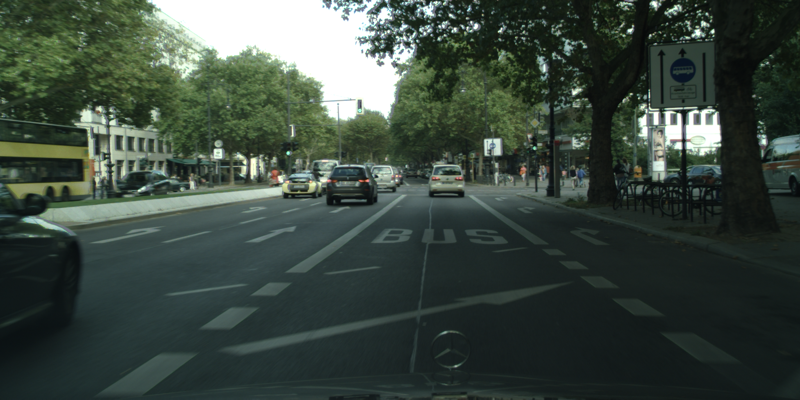

In [5]:
img = Image.open('street.png')
display(img.resize((800, 400)))

In [6]:
labels = model.predict_one(img)
print('Shape:', labels.shape)
print(labels)

Shape: (1024, 2048)
[[8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The returned labels are in a NumPy array, with integer values representing the 19 semantic classes from Cityscapes.

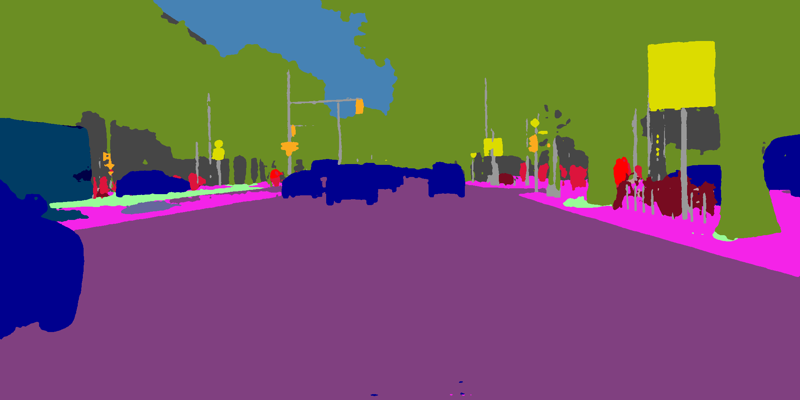

In [7]:
colorized = colorize(labels)
display(colorized.resize((800, 400)))

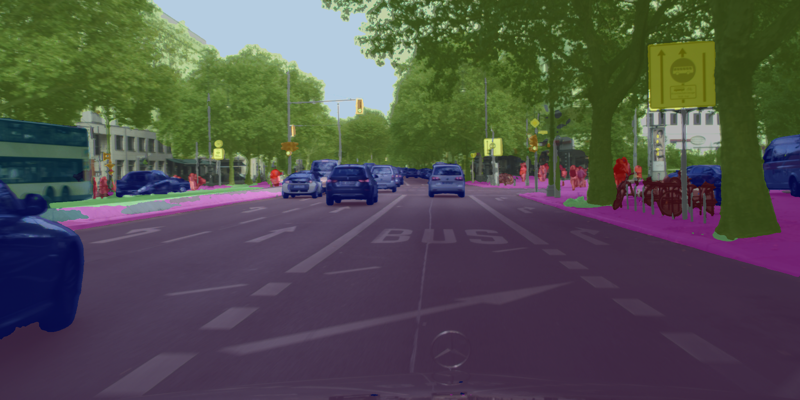

In [8]:
composited = blend(img, colorized)
display(composited.resize((800, 400)))